<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1200px-Olympic_rings_without_rims.svg.png" alt="olympic logo" width="450" height="200">
</center>

---


<center><h2>120 years of Olympic Analysis </h2>

</center> 

---



# Pyspark Just in case

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

^C


In [ ]:
!tar xf '/content/drive/MyDrive/Colab Notebooks/Spark/spark-3.0.2-bin-hadoop3.2.tgz'

^C


In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find() # check spark ade ke tak

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Olympic")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark #check spark session/version

# Pre-Processing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [ ]:
pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/athlete_events.csv")
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [ ]:
df.isnull().sum() #check the sum values in the dataframe

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

there are a lot of missiong values in Age, Height, Weight and Medal. Medal has a lot of missing values. This can be explain that not all participant won medal

In [ ]:
df.Medal.fillna('NO MEDAL', inplace = True) #fill the null values in the medal column into no medal

In [ ]:
df.shape # original shape

(271116, 15)

In [ ]:
df.dropna(inplace=True) # drop any null values in any column

In [ ]:
print(df.shape) #shape after null values is removed
print(df.isnull().sum()) # check the null values again

(206165, 15)
ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


# Wrangling and data overview


In [ ]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [ ]:
df.describe() # numerical columns

,ID,Age,Height,Weight,Year
count,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000
mean,68616.017675,25.055509,175.371950,70.688337,1989.674678
std,38996.514355,5.483096,10.546088,14.340338,20.130865
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,35194.000000,21.000000,168.000000,60.000000,1976.000000
50%,68629.000000,24.000000,175.000000,70.000000,1992.000000
75%,102313.000000,28.000000,183.000000,79.000000,2006.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


In [ ]:
df.nunique(axis=0) #number of uniques values in each column

ID        99088
Name      98546
Sex           2
Age          61
Height       94
Weight      217
Team        660
NOC         226
Games        51
Year         35
Season        2
City         42
Sport        56
Event       590
Medal         4
dtype: int64

In [ ]:
print('Number of participating countries until now:' ,len(df.NOC.unique()))

Number of participating countries until now: 226


Since Olympics is divided betweem summer and winter season. We divide the main df to df summer and winter

In [ ]:
df_summer = df[df.Season == 'Summer']
df_winter = df[df.Season == 'Winter']

In [ ]:
print('Number of participating countries in summer season until now:' ,len(df_summer.NOC.unique()))
print('Number of participating countries in winter season until now:' ,len(df_winter.NOC.unique()))

Number of participating countries in summer season until now: 226
Number of participating countries in winter season until now: 114


In [ ]:
# plt.style.available

In [ ]:
sr_countries_most_part=df.groupby('NOC').nunique()['Year'].sort_values(ascending=False)
sr_countries_most_part[-5:]# countries with least participation over the year

NOC
RHO    1
NFL    1
YMD    1
EUN    1
ROT    1
Name: Year, dtype: int64

Countries with most participations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


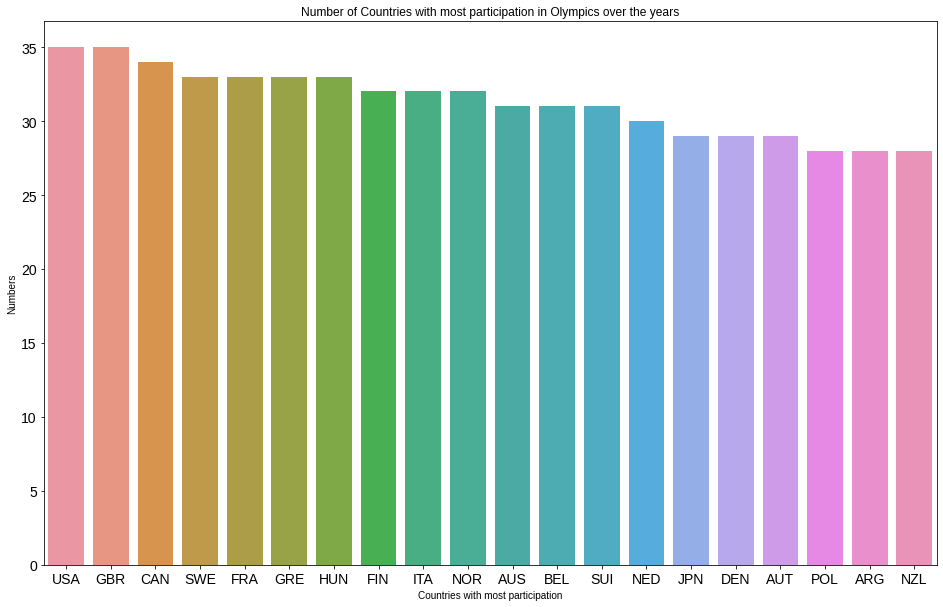

In [ ]:
fig, ax = plt.subplots(figsize=(16,10)) 
plt.style.use('seaborn-whitegrid')

sns.barplot(sr_countries_most_part[:20].index, sr_countries_most_part[:20].values)

plt.ylabel('Numbers')
plt.xlabel('Countries with most participation')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Number of Countries with most participation in Olympics over the years')
plt.show()

Countries that got most medal during entire Olympic events

In [ ]:
Medalist_country = df[df['Medal']!='NO MEDAL']

In [ ]:
hh=Medalist_country.Team.value_counts().reset_index(name='Medal').head(n=10)

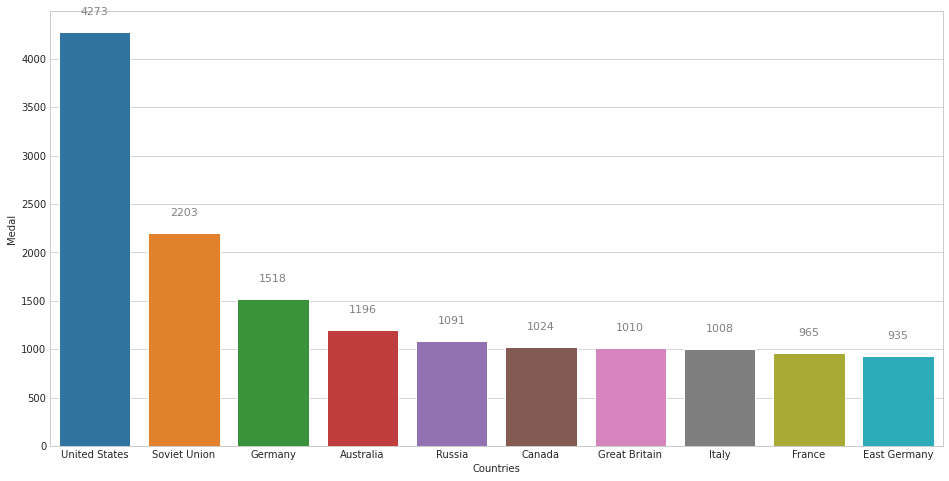

In [ ]:
fig, ax = plt.subplots(figsize=(16,8)) 
sns.set_style("whitegrid")
sns.barplot(x='index', y='Medal' ,data=hh)
plt.xlabel('Countries')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                textcoords='offset points')
plt.show()

Medal distribution for top countries

In [ ]:
df_medal = df.loc[(df['Medal']=='Gold')| 
                  (df['Medal']=='Silver') | 
                  (df['Medal']=='Bronze')].groupby(['Team','Medal']).size().to_frame().reset_index()

In [ ]:
df_medal.columns=['Team','Medal','Count']
df_medal.columns

Index(['Team', 'Medal', 'Count'], dtype='object')

In [ ]:
top_medal_country=df_medal[df_medal['Team'].isin(['United States','Soviet Union','Germany',
                                                  'Australia','Russia','Canada',
                                                  'Great Britain','Italy','France'])]

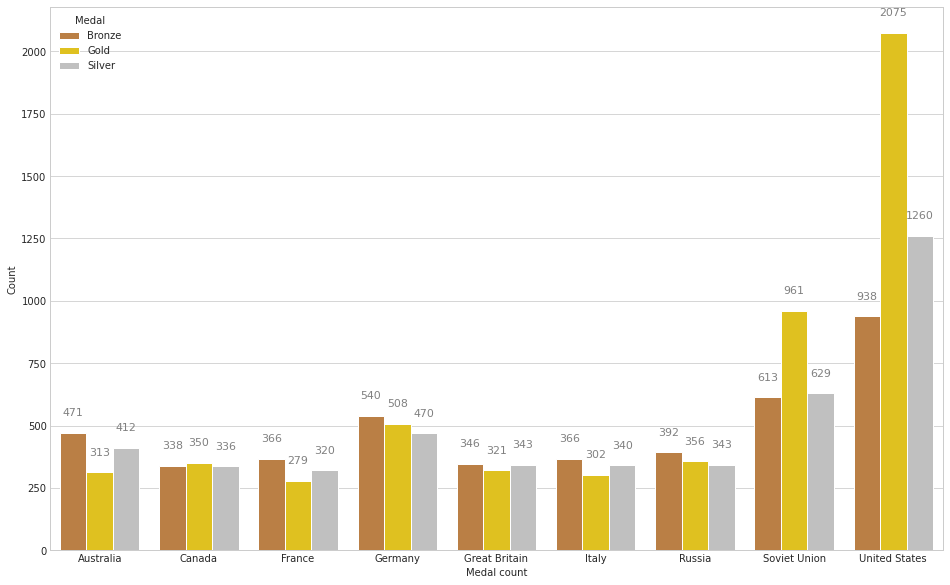

In [ ]:
fig, ax = plt.subplots(figsize=(16,10)) 
sns.set_style("whitegrid")
sns.barplot(x="Team", y="Count",hue='Medal' ,data=top_medal_country,palette=["#CD7F32", "#FFD700", "#C0C0C0"])
plt.xlabel('Medal count')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                textcoords='offset points')
plt.show()

Most **number of sports** offered for all **summer and winter**  Olympics

In [ ]:
# df_summer.Event.nunique()
summer_number_sports = df_summer.groupby('Sport').nunique()['Year'].sort_values(ascending=False)
winter_number_sports = df_winter.groupby('Sport').nunique()['Year'].sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


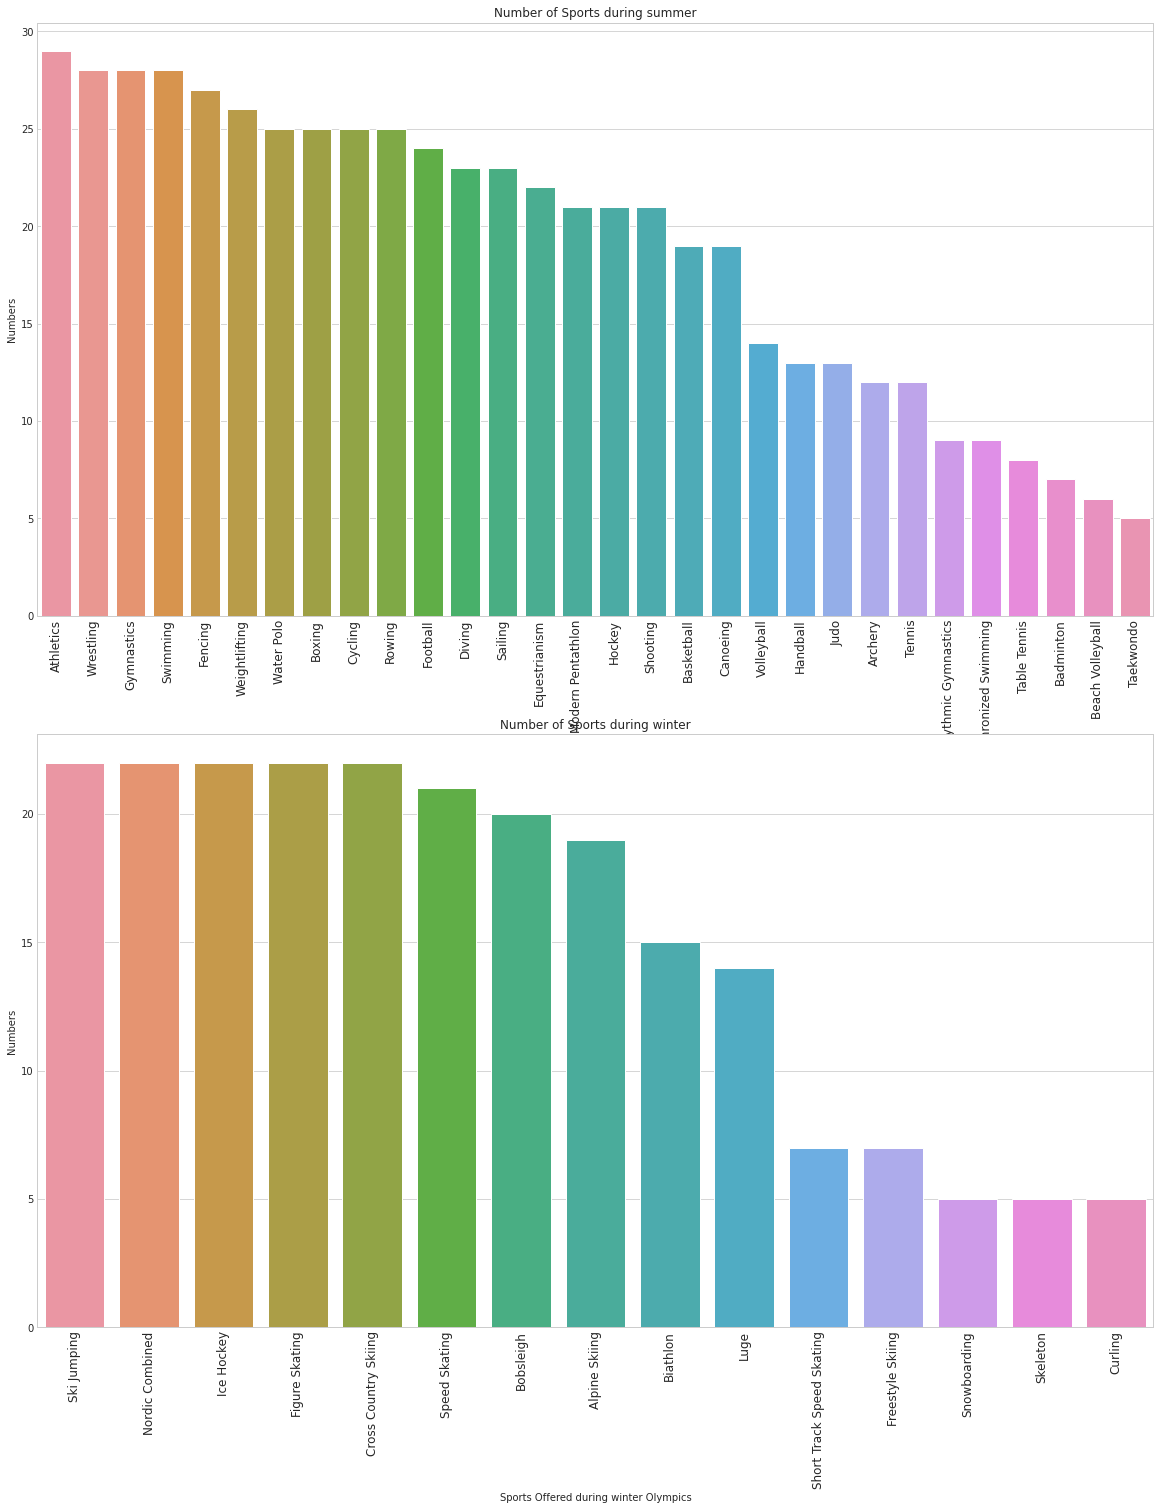

In [ ]:
fig, ax = plt.subplots(figsize=(20,24)) 
#summer sports ovet the years
plt.subplot(2,1,1)
sns.barplot(summer_number_sports[:30].index, summer_number_sports[:30].values)
plt.ylabel('Numbers')
plt.xlabel('Sports Offered during summer Olympics')
plt.xticks(rotation=90,fontsize=12)
plt.title('Number of Sports during summer')
#put the value on the tip of the bars
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                textcoords='offset points') 
#winter sports over the year
plt.subplot(2,1,2)
sns.barplot(winter_number_sports[:30].index, winter_number_sports[:30].values)
plt.ylabel('Numbers')
plt.xlabel('Sports Offered during winter Olympics')
plt.xticks(rotation=90,fontsize=12)
plt.title('Number of Sports during winter')
#put the value on the tip of the bars
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                textcoords='offset points') 
plt.show()

Countries **participation in summer** Olympics with **important event** in the **history** of Olympics

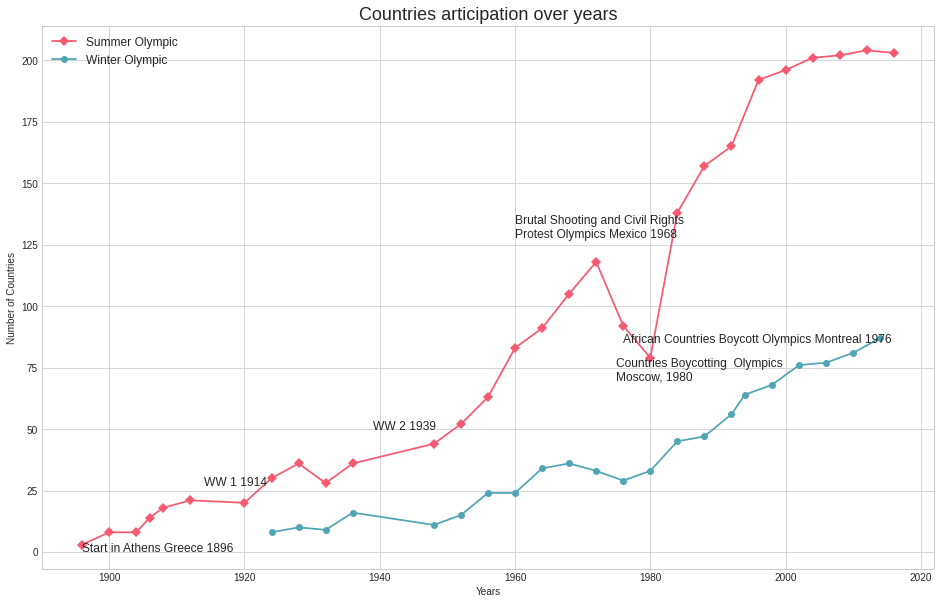

In [ ]:
#plotting the time line event and particapation of countries
fig, ax = plt.subplots(figsize=(16,10)) 
plt.style.use('seaborn')

# summer time line
plt.plot(df_summer.groupby('Year').NOC.nunique(), label='Summer Olympic',marker='D', color='#F65A71')
# witner time line
plt.plot(df_winter.groupby('Year').NOC.nunique(), label='Winter Olympic',marker='o', color='#51A5B4')
plt.title('Countries articipation over years', fontsize=18)
plt.legend(fontsize=12)
plt.ylabel('Number of Countries')
plt.xlabel('Years')
#mark important event in summer opympic
font=12
plt.text(1896,0,'Start in Athens Greece 1896',fontsize=font)
plt.text(1914, 27,'WW 1 1914 ',fontsize=font)
plt.text(1939,50,'WW 2 1939',fontsize=font)
plt.text(1960,128,'Brutal Shooting and Civil Rights \nProtest Olympics Mexico 1968',fontsize=font)
plt.text(1976,85,'African Countries Boycott Olympics Montreal 1976',fontsize=font)
plt.text(1975,70,'Countries Boycotting  Olympics \nMoscow, 1980',fontsize=font)

# plt.text(1924,-2,'First Winter Olympics \nFrench Alps, 1924'fontsize=font)
plt.show()

The number of participation decrease during the insident of brutal shooting in Mexico Olympic 1968. It keep decreasing after African athlete boycotting the Olympic in Montreal 1976 and Moscow 1980 because of the communism 

https://www.britannica.com/list/7-significant-political-events-at-the-olympic-games

The **correlation** in the data set

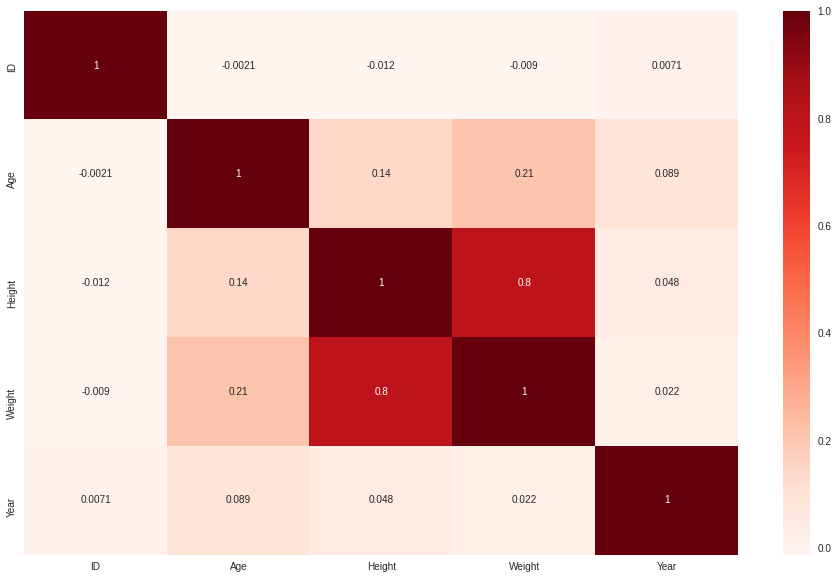

In [ ]:
#Using Pearson Correlation to determine which numeric features has high correlation to each other
fig, ax = plt.subplots(figsize=(16,10)) 
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Look like weight and height highly corelated to each other where as age and year implies weaker correlation

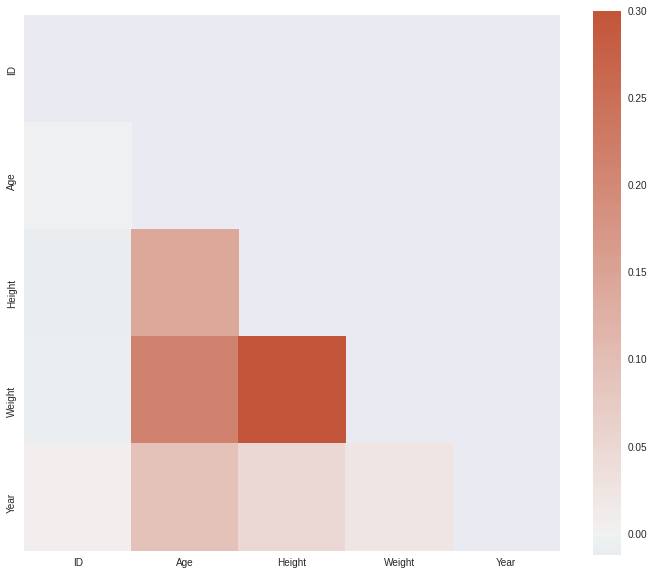

In [ ]:
fig, ax = plt.subplots(figsize=(12,10)) 
cor = df.corr()
# Generate a mask for the upper triangle if 
mask = np.triu(np.ones_like(cor, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask 
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Modern days Olympic overviews

In [ ]:
recent_olympic = df[df['Year']>=2014]

In [ ]:
recent_olympic.shape

(18116, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



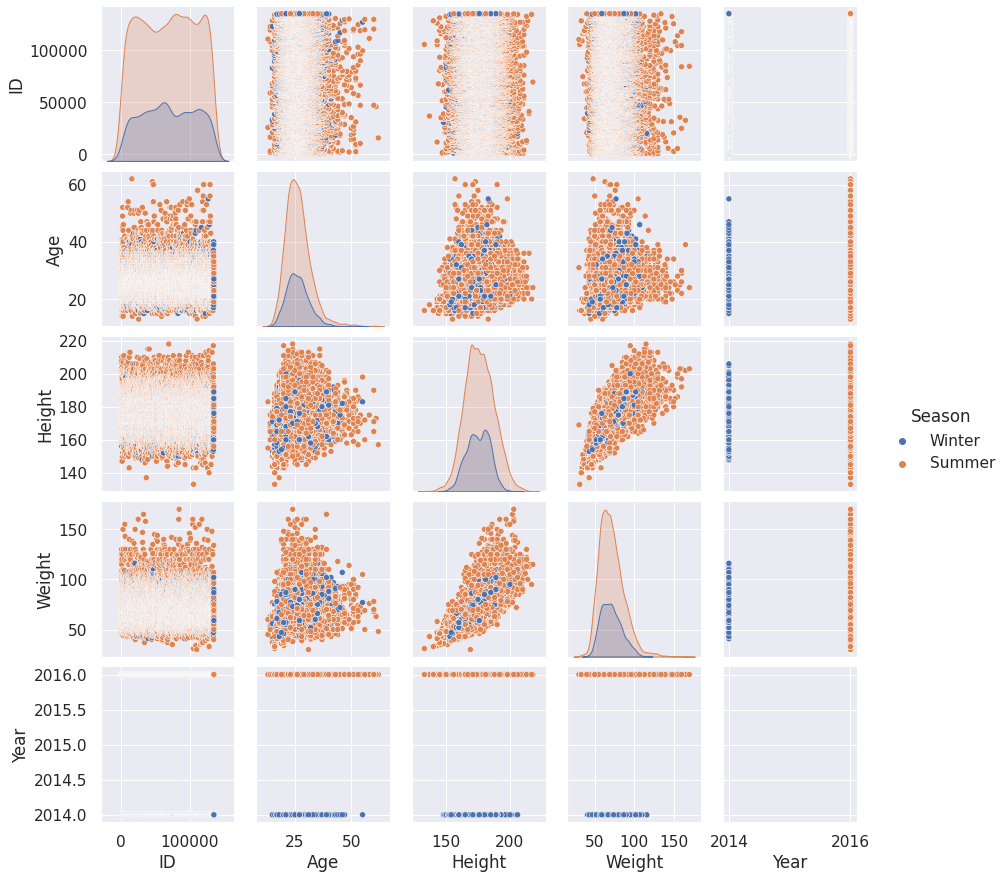

In [ ]:
sns.pairplot(recent_olympic,hue="Season")

# Analysis 1

**Which of the countries is the best at the football sport? (Descriptive)**

In [ ]:
df_football = df[df['Sport'] == 'Football'] #filter only football sports
df_football.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
157,61,Stefan Abadzhiev,M,26.0,175.0,72.0,Bulgaria,BUL,1960 Summer,1960,Summer,Roma,Football,Football Men's Football,NO MEDAL
178,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,Cameroon,CMR,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Gold
183,81,Georgios Abaris,M,22.0,190.0,77.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Football,Football Men's Football,NO MEDAL


In [ ]:
# df_football[df['Medal'=='Gold'&'NOC']]
gold_football= df_football.groupby(df_football.Team[df['Medal']=='Gold']).nunique()['Year'].sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



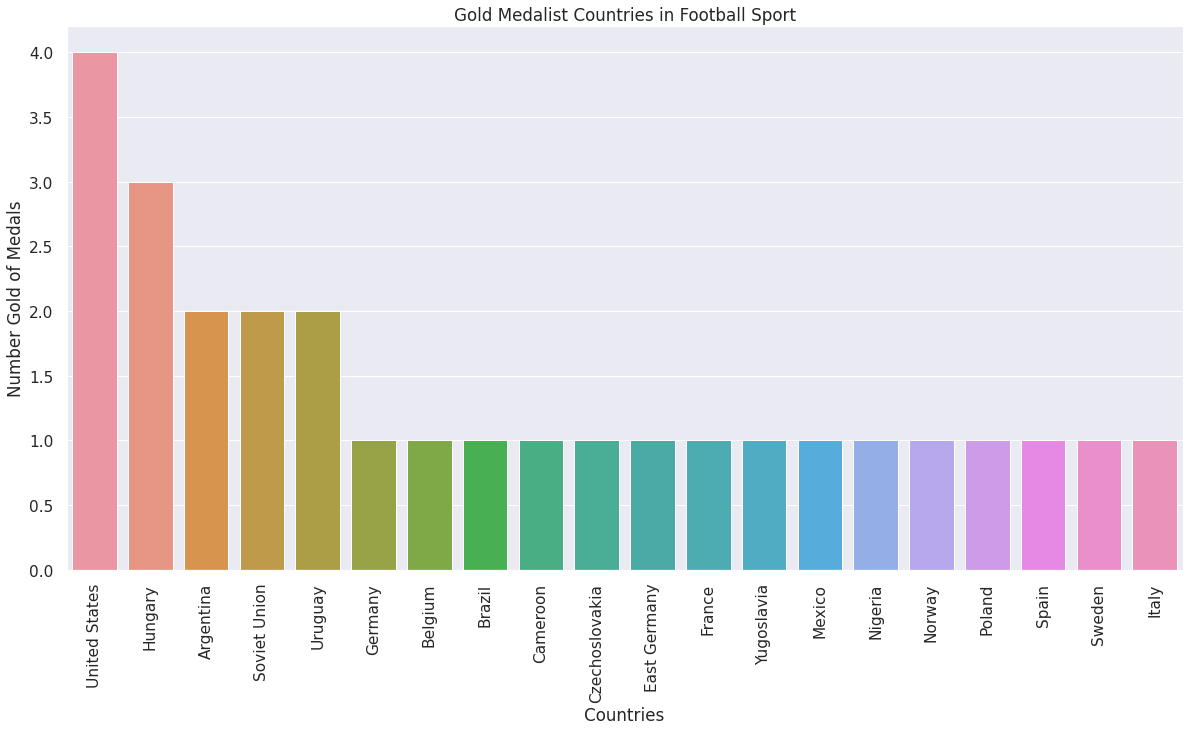

In [ ]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.barplot(gold_football.index, gold_football.values)
plt.title('Gold Medalist Countries in Football Sport')
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('Number Gold of Medals')
plt.show()

In football sports including woman and men, **USA has won 4 times** gold medals over the years Olympic event organized followed by **Hungary** with **3 times**. Argentina, Uruguay and Soviet Union shared the same number of gold medal with 2 times winning the football sport.

Why dont we analyze how many times these gold medalist countries participate in total for football games in Olympics.

In [ ]:
gold_football_part=df_football.groupby('Team').nunique()['Year'].sort_values(ascending=False)

In [ ]:
gold_football_part

Team
Italy            13
France           12
United States    12
Mexico           11
Sweden           11
                 ..
Fiji              1
Mali              1
Zambia            1
Gabon             1
Zimbabwe          1
Name: Year, Length: 81, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



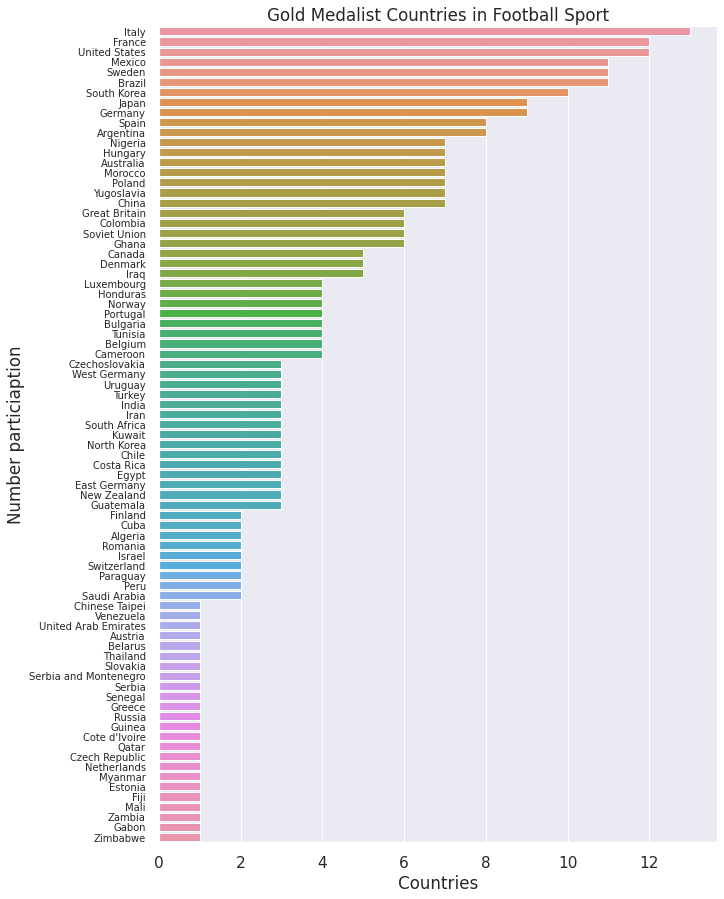

In [ ]:
fig, ax = plt.subplots(figsize=(10,15)) 
sns.barplot( gold_football_part.values, gold_football_part.index)
plt.title('Gold Medalist Countries in Football Sport')
plt.xlabel('Countries')
plt.ylabel('Number particiaption')
plt.yticks(fontsize=10)
plt.show()

Look like it takes several tries for some countries to win gold medal in football sport. It takes **12 times for USA to win 4 gold medal** whereas it takes **Hungray 7 times to win 3 gold medal** which **43% success** rate.

In [ ]:

# for x in gold_football.index:
#    print(x, df_football.groupby(df_football.Team[df['Team']==x]).nunique()['Year'].values)
# gold_football.index

# Analysis 2

**Given the summer season, list the cities that have sports during that time? (Exploratory)**

In [ ]:
df_summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NO MEDAL
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NO MEDAL
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NO MEDAL
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NO MEDAL
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NO MEDAL


We group the data frame to the number of occurence of the city

In [ ]:
city = df_summer.groupby('City').nunique()['Year'].sort_values(ascending=False) # 

In [ ]:
city.head()

City
Athina         3
London         3
Los Angeles    2
Stockholm      2
Paris          2
Name: Year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



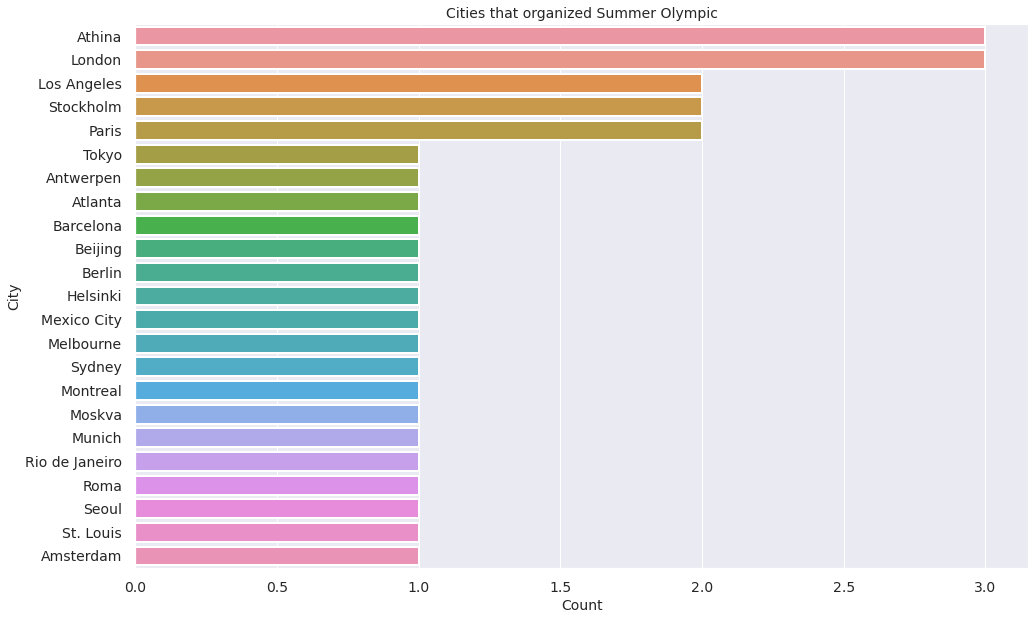

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
sns.barplot(city.values, city.index,edgecolor="white",linewidth=2)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('City',fontsize=14)
plt.xlabel('Count',fontsize=14)
plt.title('Cities that organized Summer Olympic',fontsize=14)
plt.show()

In [ ]:
city.count()

23

From the plot above, there are 23 cities already oganized the summer Olympic at least once

In [ ]:
import plotly.express as px

We explore the event during the Olympics in London since it already Organized 3 times over the years.

In [ ]:
df_summer_london=df_summer[df_summer['City']=='London']

In [ ]:
events = df_summer_london['Event'].value_counts() #creating varibale to be put into tree map
values = events.values
categories = pd.DataFrame(data=events.index, columns=["Event name"])
categories['values'] = values

In [ ]:
fig = px.treemap(categories, path=["Event name"], values=values, height=700,
                 title='Event offered during summer Olympics in London', color_discrete_sequence = px.colors.sequential.RdBu)
fig.data[0].textinfo = 'label+text+value'
fig.show()

There are 23 city already organized the summer Olympic which London (United Kingdom) and Athen (Greece) 3 times each. Most of the sport held during the year Olympic was held in the London are Football and Basketball including men and women. 

# Analysis 3

**Does the increment of the age of the athletes increase the participation of the athletes? (Inferential)**

In [ ]:
# plt.plot(summer_participation.ID, marker = 'o', color = 'red', linestyle = '-')

In [ ]:
age1 = df[df['Year']>1980] # get the year only after 1980

In [ ]:
age1= age1.sort_values(by=['Year']) #sort the data frame by year

we plot the distribution of age in each year after 1980 because after 1980, paricipation of the countries increase consistently.

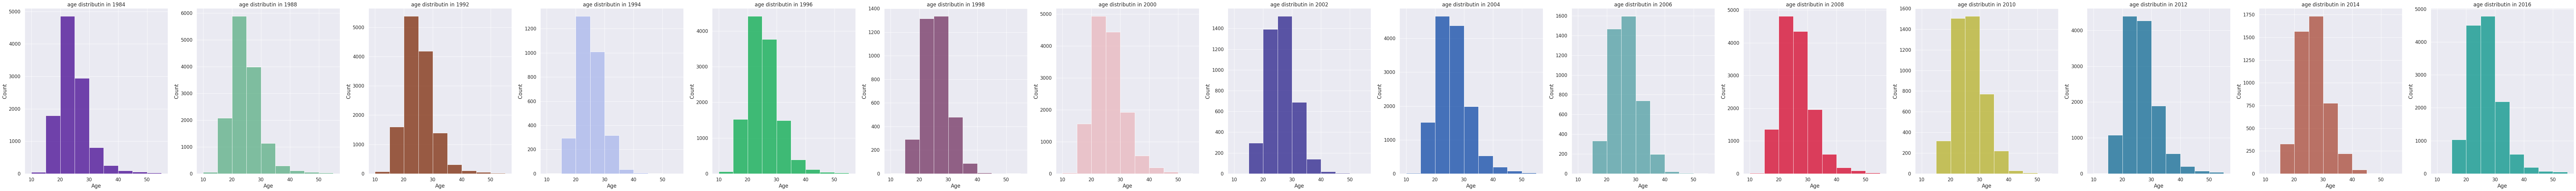

In [ ]:
fig, ax = plt.subplots(1, 15, figsize=(150, 10))
# fig, ax = plt.subplots(figsize=(20,8))
i=0
bins_list = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
for col in age1.Year.unique():
  gett = df[df['Year']==col].Age #take the age columns only and plot the values distribution
  # plt.xlabel('Age')
  sns.histplot(gett.values,ax=ax[i],bins=bins_list,color=np.random.rand(3,)).set_title('age distributin in '+str(col))
  plt.setp(ax[i], xlabel='Age')
  i += 1



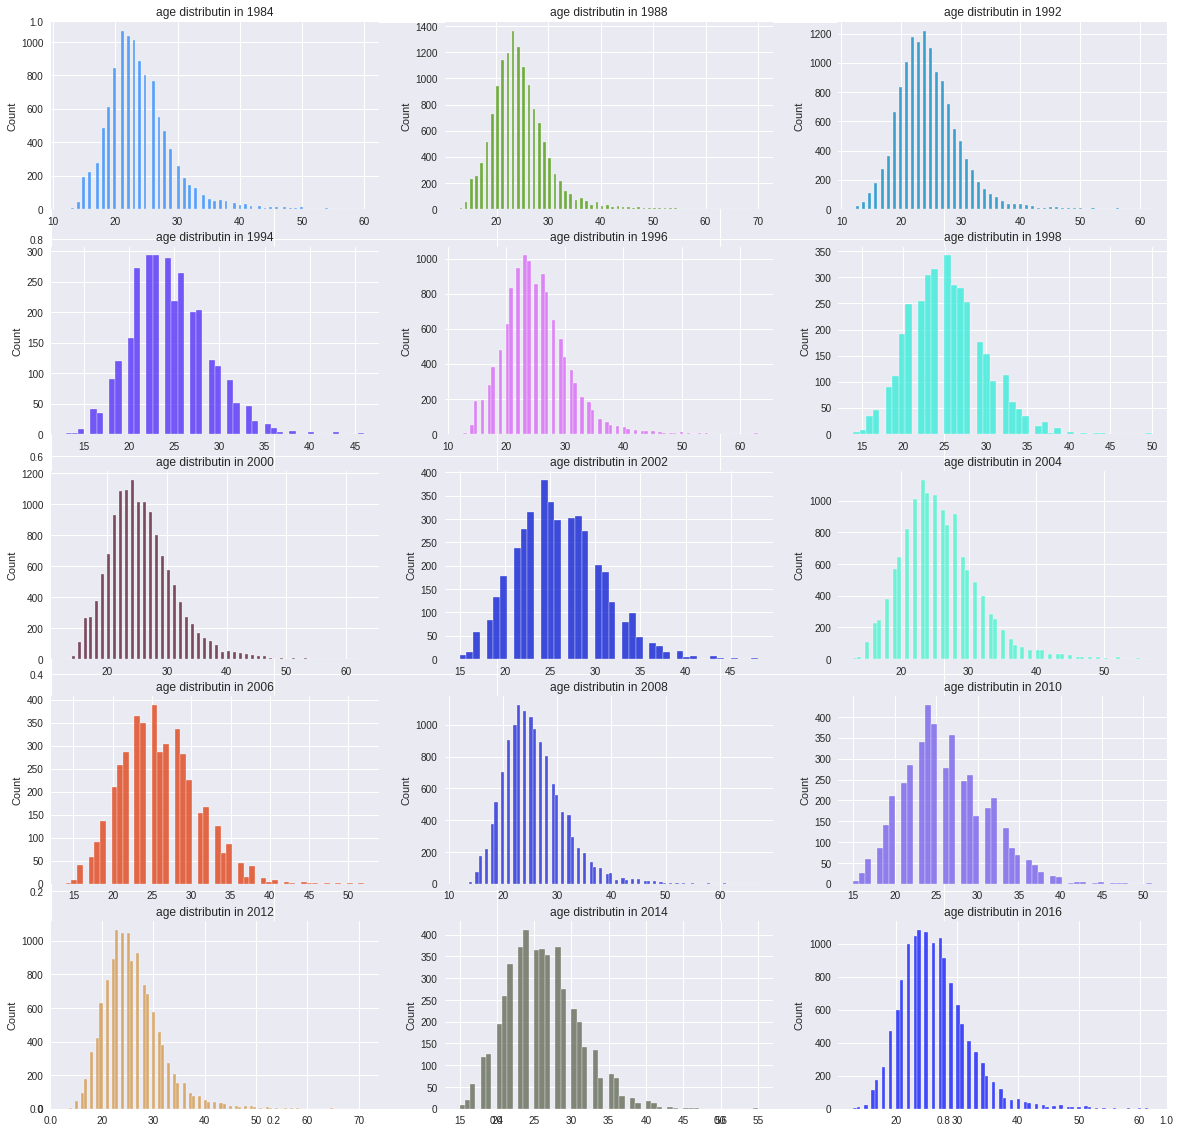

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
i=0
for col in age1.Year.unique():
  i += 1
  ax = fig.add_subplot(5,3,i)
  gett = df[df['Year']==col].Age #take the age columns only and plot the values distribution
  sns.histplot(gett.values,color=np.random.rand(3,)).set_title('age distributin in '+str(col))
plt.show()

The age distribution of the athletes were mostly **between 20 - 40 years old**. To analyze if there is relationship if the age requirement have an impact to the number of participant, we plot the box plot to see the range and the outliers of the athlete.

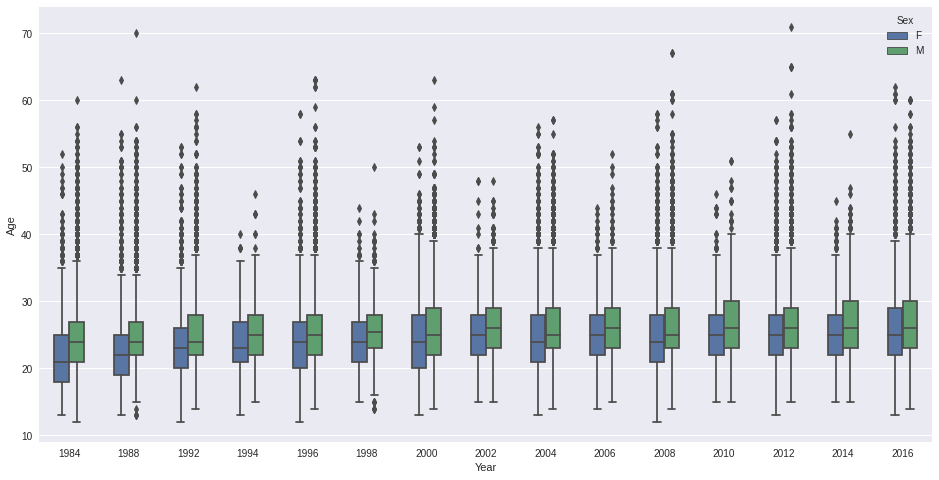

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=age1,y='Age',x='Year',hue='Sex',width=0.5) #plotting the boxplot
plt.show()

Even though there are outliers at age more than 40s is still does not make the hyphothesis accurate which the age limit increase the number participations. Since there are no age limit in the olympics except the football team must be below 23 gymnastics must be above 16, it could not contribute to the partication instead we belive it contribute to the medal tally of the countries

In [ ]:
summer_participation = df[df.Season=='Summer'].groupby(['Year']).sum() #summer df
winter_participation = df[df.Season=='Winter'].groupby(['Year']).sum() #winter df 

In [ ]:
sr_summer_participants = df_summer[df_summer.Season=='Summer'].groupby(['Year'])['NOC'].nunique() # series number of counries by year
sr_winter_participants = df_winter[df_winter.Season=='Winter'].groupby(['Year'])['NOC'].nunique()

In [ ]:
sr_summer_sports = df_summer[df_summer.Season=='Summer'].groupby(['Year'])['Sport'].nunique()
sr_winter_sports = df_winter[df_winter.Season=='Winter'].groupby(['Year'])['Sport'].nunique()

To find the factor that affect the number of participations in the Olympic, we assume that it caused by the number of countries that are participated over the years.

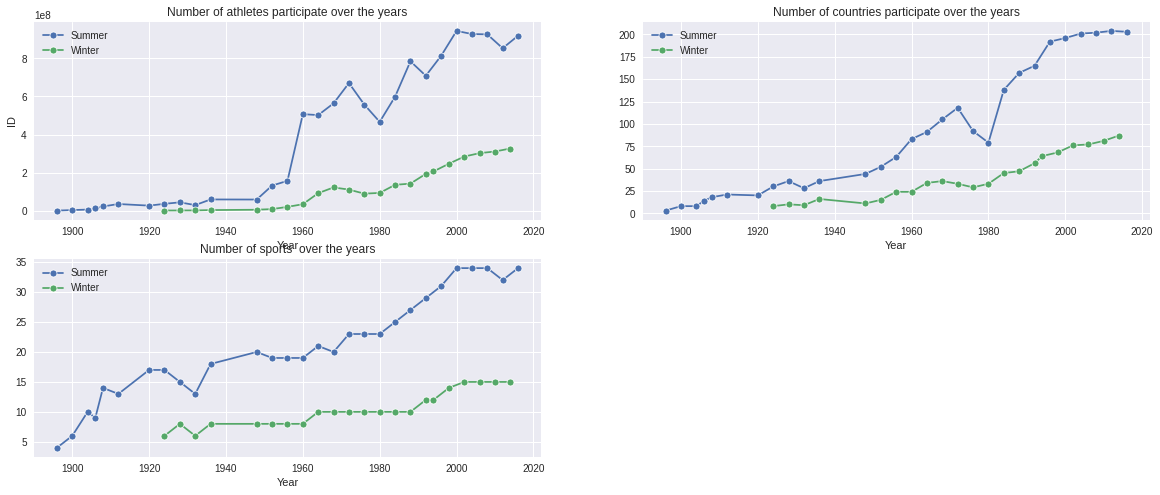

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
#plotting the total number of athletes
plt.subplot(2,2,1)
sns.lineplot(data=summer_participation, x="Year", y="ID", marker="o")
sns.lineplot(data=winter_participation, x="Year", y="ID", marker="o")
plt.legend(['Summer','Winter'])
plt.title('Number of athletes participate over the years')
#plotting the number of countries participate 
plt.subplot(2,2,2)
sns.lineplot(x=sr_summer_participants.index ,y=sr_summer_participants.values, marker="o")
sns.lineplot(x=sr_winter_participants.index ,y=sr_winter_participants.values, marker="o")
plt.legend(['Summer','Winter'])
plt.title('Number of countries participate over the years')
#plotting the total number of sports
plt.subplot(2,2,3)
sns.lineplot(x=sr_summer_sports.index ,y=sr_summer_sports.values, marker="o")
sns.lineplot(x=sr_winter_sports.index ,y=sr_winter_sports.values, marker="o")
plt.legend(['Summer','Winter'])
plt.title('Number of sports  over the years')
plt.show()

Look like the **number of participations** is significantly **affect by** the **number of countries participated**. For the past 50 year, the number of participation of the countries had increased twice for summer event. Moreover, it also could cause by the **number of sports offered** by the organiser.

# Analysis 4

**Which country has organized an Olympic event more than once? (Exploratory)**

since city dataframe already been created during analysis 2, we take the dataframe again to select which city orgranized more than once Olympic

In [ ]:
for x in city.index: # list all the summer Olympic Organizer
  print(x,'Summer Olympic was held',df_summer.Year[df_summer['City']==x].unique())

Athina Summer Olympic was held [2004 1906 1896]
London Summer Olympic was held [2012 1948 1908]
Los Angeles Summer Olympic was held [1984 1932]
Stockholm Summer Olympic was held [1912 1956]
Paris Summer Olympic was held [1924 1900]
Tokyo Summer Olympic was held [1964]
Antwerpen Summer Olympic was held [1920]
Atlanta Summer Olympic was held [1996]
Barcelona Summer Olympic was held [1992]
Beijing Summer Olympic was held [2008]
Berlin Summer Olympic was held [1936]
Helsinki Summer Olympic was held [1952]
Mexico City Summer Olympic was held [1968]
Melbourne Summer Olympic was held [1956]
Sydney Summer Olympic was held [2000]
Montreal Summer Olympic was held [1976]
Moskva Summer Olympic was held [1980]
Munich Summer Olympic was held [1972]
Rio de Janeiro Summer Olympic was held [2016]
Roma Summer Olympic was held [1960]
Seoul Summer Olympic was held [1988]
St. Louis Summer Olympic was held [1904]
Amsterdam Summer Olympic was held [1928]


In [ ]:
city_winter = df_winter.groupby('City').nunique()['Year'].sort_values(ascending=False) # differentiate for winter olympic

In [ ]:
for x in city_winter.index: # list all the summer Olympic Organizer
  print(x,'Winter Olympic was held',df_winter.Year[df_winter['City']==x].unique())

Sankt Moritz Winter Olympic was held [1928 1948]
Innsbruck Winter Olympic was held [1964 1976]
Lake Placid Winter Olympic was held [1980 1932]
Vancouver Winter Olympic was held [2010]
Lillehammer Winter Olympic was held [1994]
Calgary Winter Olympic was held [1988]
Chamonix Winter Olympic was held [1924]
Cortina d'Ampezzo Winter Olympic was held [1956]
Garmisch-Partenkirchen Winter Olympic was held [1936]
Grenoble Winter Olympic was held [1968]
Nagano Winter Olympic was held [1998]
Torino Winter Olympic was held [2006]
Oslo Winter Olympic was held [1952]
Salt Lake City Winter Olympic was held [2002]
Sapporo Winter Olympic was held [1972]
Sarajevo Winter Olympic was held [1984]
Sochi Winter Olympic was held [2014]
Squaw Valley Winter Olympic was held [1960]
Albertville Winter Olympic was held [1992]


In [ ]:
city_summer = city

recreate the series in which countries organized more Olympics event more than once for summer and winter events.

In [ ]:
city_summer = city_summer[city_summer.values>1]
city_winter = city_winter[city_winter.values>1]

In [ ]:
df_city = df.groupby('City').nunique()['Year'].sort_values(ascending=False)
df_city.head(3)

City
London         3
Athina         3
Los Angeles    2
Name: Year, dtype: int64

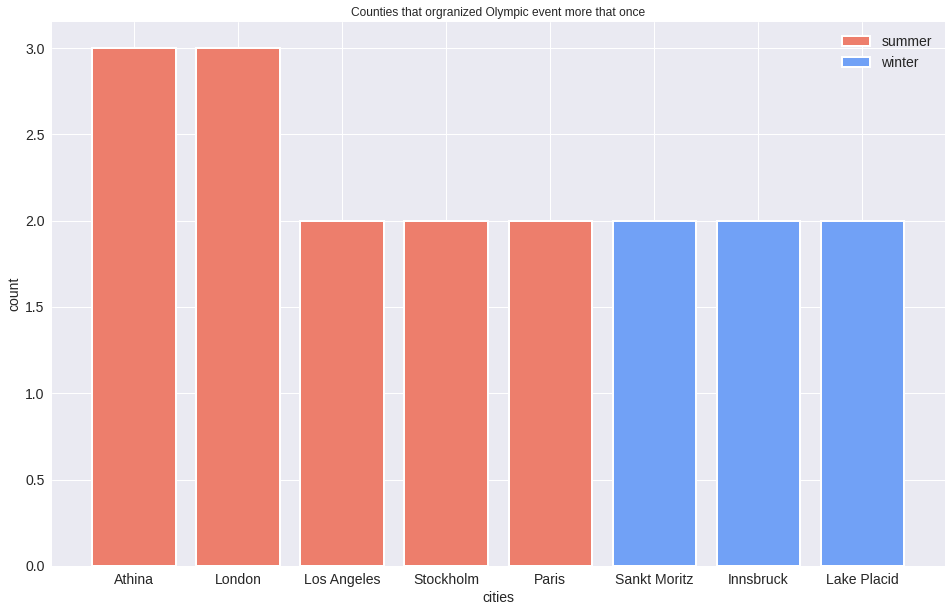

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
# plt.subplot(1,2,1)
plt.bar(city_summer.index,city_summer.values, color='#ED7E6C',edgecolor="white",linewidth=2)
# plt.subplot(1,2,2)
plt.bar(city_winter.index,city_winter.values, color='#71A1F6',edgecolor="white",linewidth=2)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('count',fontsize=14)
plt.xlabel('cities',fontsize=14)
plt.title('Counties that orgranized Olympic event more that once')
plt.legend(['summer','winter'],fontsize=14)
plt.show()

Both cities **London and Athens** has already organized **Summer Olympic  3 times** in 2004 1906 1896(Athens) and 2012 1948 1908(London) respectively. **Stockholm and Paris** orgranized **twiced** where as **Sankt Moritz, Innbruck and Lake Placid** already orgranized **Winter Olympics twice** .Tokyo will organize next Summer Olympic in 2021 after it postponed on 2020 because of pandemic Covid-19.

# Analysis 5

**Given the features of physicality of the athletes, is it possible to predict which sport that they belong to? (Predictive)**

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
le = preprocessing.LabelEncoder() #preprocessing to change to numeric

We take same the phylicality columns as our features to predit the which sports the athlete belong

In [ ]:
df_features = df[['Sex'	,'Age'	,'Height'	,'Weight', 'Sport']] #taking important features and target

In [ ]:
df_features=df_features.apply(le.fit_transform) #changing all string to numeric

In [ ]:
df_features.head(3)

,Sex,Age,Height,Weight,Sport
0,1,13,50,83,6
1,1,12,40,43,26
4,0,10,55,87,43


Removing the column sport and assigne as the target

In [ ]:
target_name = 'Sport' 
y = df_features[target_name] # the target is better life or not
x = df_features.drop([target_name], axis=1)

In [ ]:
x.head(2) #features

,Sex,Age,Height,Weight
0,1,13,50,83
1,1,12,40,43


In [ ]:
y.head(2) #target

0     6
1    26
Name: Sport, dtype: int64

Then, we spit the data into 70% of training and 30% of testing before inserting into the machine learning model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=True) #split test train into 70%train 30%test

Start predicting and fitting into the model

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred) #print the prediction score accuracy

0.3269846402586904

In [ ]:
df['Sport'].nunique() #count of uniques values

56

The **predicition is low**. This could be explained since the **target** of the prediction is **too many which is 56 targets**. The accuracy of the model can be increase if the traget is small.

Rather than taking all the type of sports, we limit the target into most popular sport watched during Olympic which are **Football, Swimming  and Gymnastics.**

In [ ]:
df_features2 = df[(df['Sport']=='Football') | (df['Sport']=='Swimming') | (df['Sport']=='Gymnastics')]

take the row in which only related to football, swimming and gymnastics sport and taking the physicality columns same as before. This time the target is only sport Football, Swimming and Gymnastics.

In [ ]:
df_features2 = df_features2[['Sex'	,'Age'	,'Height'	,'Weight', 'Sport']]

In [ ]:
df_features2=df_features2.apply(le.fit_transform) #normalize the data

In [ ]:
target_name = 'Sport' 
y = df_features2[target_name] # the target is better life or not
x = df_features2.drop([target_name], axis=1)

Same as before the split the training into 70% and testing 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=True) #split test train into 70%train 30%test

Start predicting again and fitting the model

In [ ]:
model = RandomForestClassifier(n_estimators=150, random_state=0) #set the estimators 150(init =100)
model.fit(X_train, y_train) # fitting into the model
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred) # print the accuracy score

0.8707319032698643

The accuracy of the prediction increasing as the target is getting smaller. **87% accuracy** for the model is quite good. This shows that indeed the target for previous model is to large as most of the athlete has optimum physicality to fit to almost type of sports.

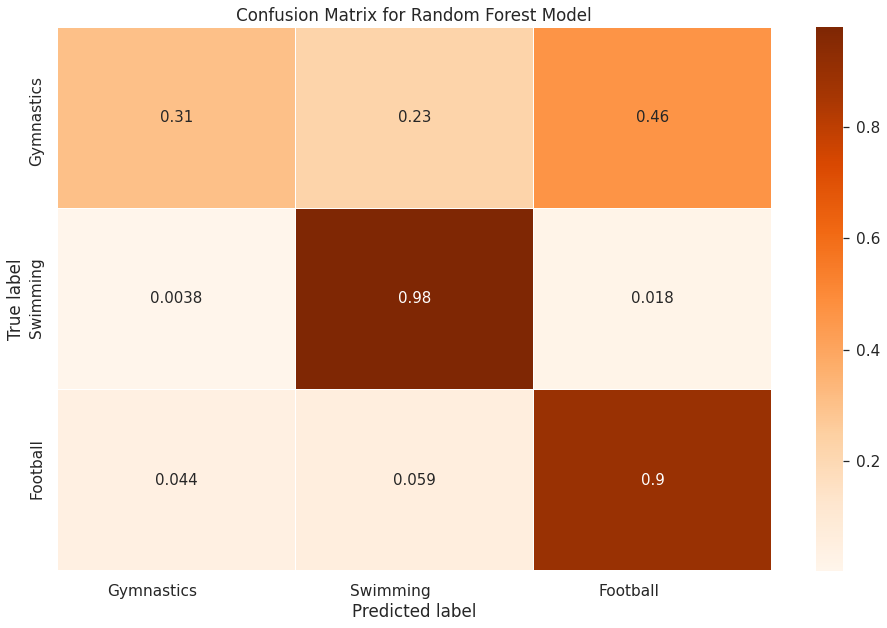

In [ ]:
#Plotting the precentage accuracy confusion matrix
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis] # to conver it as decimal places with sum of 1

# Build the plot
plt.figure(figsize=(16,10))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap="Oranges", linewidths=0.2)

# Add labels to the plot
class_names = ['Gymnastics','Swimming','Football']
tick_marks = np.arange(len(class_names))
# tick_marks2 = tick_marks + 0.5
plt.xticks((tick_marks+0.4), class_names)
plt.yticks((tick_marks+0.3), class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

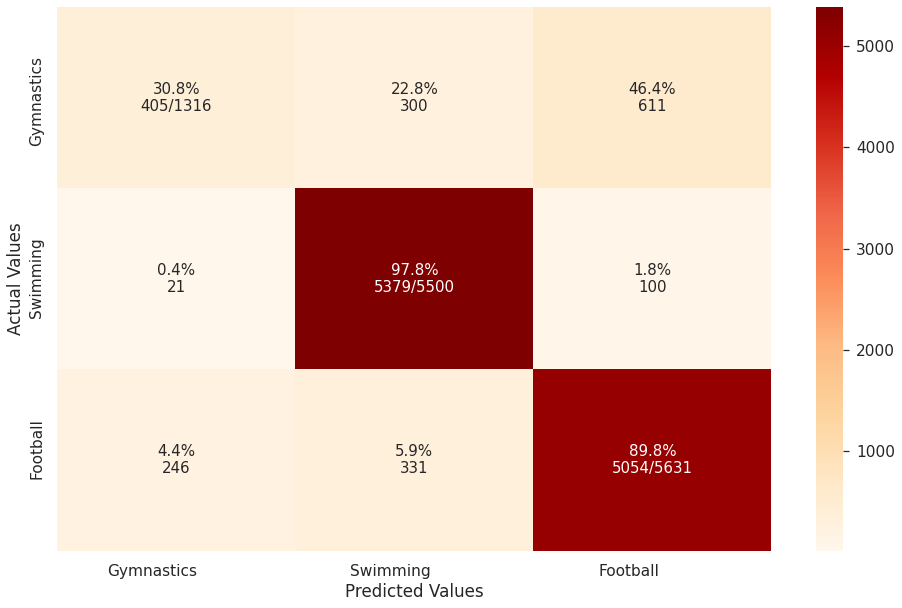

In [ ]:
#Plotting the confusion matrix with the support values of classes
def plot_cm(y_test, y_pred, figsize=(16,10)):
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual Values'
    cm.columns.name = 'Predicted Values'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "OrRd", annot=annot, fmt='', ax=ax,annot_kws={'size':15})
    class_names = ['Gymnastics','Swimming','Football']
    tick_marks = np.arange(len(class_names))
    # tick_marks2 = tick_marks + 0.5
    plt.xticks((tick_marks+0.4), class_names)
    plt.yticks((tick_marks+0.3), class_names)
plot_cm(y_test, y_pred)


As shown in the confusion matrix above, prediction for **gymnastics** athlete is quite **low(30.8%)** as true positive and most of the false positive fall into the football predictions. The prediction for **Swimming** athlete is **very high (97.8)** which is significant and almost 100%. The prediction for** Football** athlete is also **high (89.8%)**

*The diagonal values is the true positive(correct predictions)*

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Gymnastic','Swimming','Football']))

              precision    recall  f1-score   support

   Gymnastic       0.60      0.31      0.41      1316
    Swimming       0.90      0.98      0.93      5500
    Football       0.88      0.90      0.89      5631

    accuracy                           0.87     12447
   macro avg       0.79      0.73      0.74     12447
weighted avg       0.86      0.87      0.86     12447



From the classification report we conclude from the model that there are 12447 rows of the total testing data. 

*   Gymnastic support 1316 rows
*   Swimming support 5500 rows
*   Football support 5631 rows
*   Precision is the ratio between the True Positives and all the Positives.
*   The recall is the measure of our model correctly identifying True Positives
*   F1 score conveys the balance between the precision and the recall. The closer it to 1 the better the prediction, the worse would be closer to 0.



